# Google Stock Price Prediction

You can download the dataset from kaggle : https://www.kaggle.com/ptheru/googledta

In [1]:
# This code is related to limiting the tensorflow GPU ---------------------------

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [2]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv('google_data_trainset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100
1258,2017-12-29,1046.719971,1049.699951,1044.900024,1046.400024,1046.400024,887500


In [5]:
# We are having the data from 1st August 2013 to 29th December 2017
# lets take only the Open column for analysis
X = df.iloc[:,1:2].values
X.shape

(1259, 1)

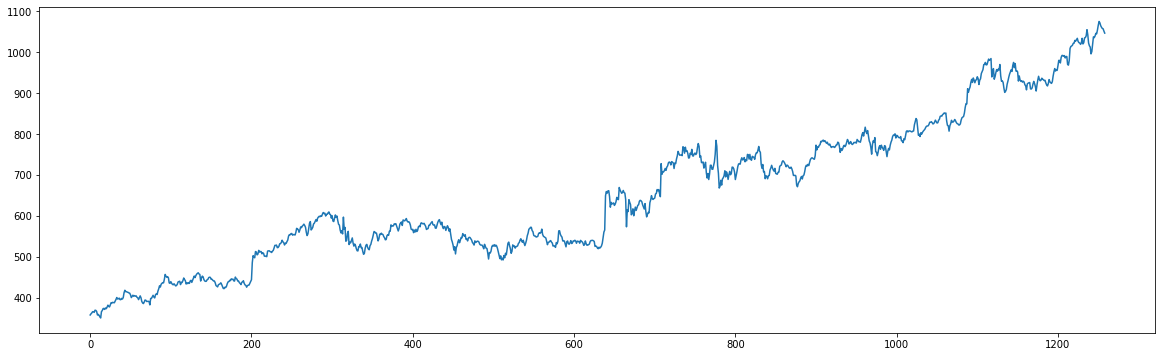

In [6]:
plt.figure(figsize=(20,6))
plt.plot(X)

# Feature Scaling 

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1)) # converting into values from 0-1
train_scaled = sc.fit_transform(X)
max(train_scaled),min(train_scaled) # Sanity check ....MinMax Scaler transforms the values between 0-1

(array([1.]), array([0.]))

In [8]:
# Now we need to create data structure with some t time stamps
X_train = []
y_train = []

for i in range(60,len(train_scaled)):
    
    X_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
    
X_train , y_train = np.array(X_train) , np.array(y_train)

In [9]:
X_train.shape

(1199, 60)

In [10]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) # converting into 3D tensors

In [11]:
X_train.shape

(1199, 60, 1)

## Creating the Model

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM , Dropout , Dense

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [14]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(60,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='Adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error']
              )

model.fit(X_train,y_train,epochs=100,batch_size=20)



Train on 1199 samples
Epoch 1/100
1199/1199 [==============================] - 5s 4ms/sample - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 2/100
1199/1199 [==============================] - 1s 569us/sample - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 3/100
1199/1199 [==============================] - 1s 563us/sample - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 4/100
1199/1199 [==============================] - 1s 588us/sample - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 5/100
1199/1199 [==============================] - 1s 578us/sample - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 6/100
1199/1199 [==============================] - 1s 563us/sample - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 7/100
1199/1199 [==============================] - 1s 560us/sample - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 8/100
1199/1199 [==============================] - 1s 566us/sample - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 9/100
1199/1199 [=====================

1199/1199 [==============================] - 1s 566us/sample - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 71/100
1199/1199 [==============================] - 1s 566us/sample - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 72/100
1199/1199 [==============================] - 1s 596us/sample - loss: 9.8401e-04 - mean_squared_error: 9.8401e-04
Epoch 73/100
1199/1199 [==============================] - 1s 575us/sample - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 74/100
1199/1199 [==============================] - 1s 560us/sample - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 75/100
1199/1199 [==============================] - 1s 562us/sample - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 76/100
1199/1199 [==============================] - 1s 551us/sample - loss: 9.6024e-04 - mean_squared_error: 9.6024e-04
Epoch 77/100
1199/1199 [==============================] - 1s 556us/sample - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 78/100
1199/1199 [=============================

# Predictions on the test dataset

In [38]:
test_data = pd.read_csv('google_data_trainset.csv')
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [39]:
real_stock_price = test_data.iloc[:,1:2].values

In [40]:
real_stock_price

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [41]:
dataset_total = pd.concat((df['Open'],test_data['Open']),axis=0)

In [42]:
dataset_total.shape

(2518,)

In [43]:
inputs = dataset_total[len(dataset_total) - len(test_data)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      , ..., 1057.390015,
       1051.599976, 1046.719971])

In [44]:
inputs = inputs.reshape(-1,1)

In [45]:
inputs.shape

(1319, 1)

In [46]:
inputs = sc.transform(inputs)
inputs.shape

(1319, 1)

In [47]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [48]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [49]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [50]:
predicted_price = model.predict(x_test)

In [51]:
predicted_price = sc.inverse_transform(predicted_price) # Undo the scaling of X according to feature_range
predicted_price

array([[1038.2777 ],
       [ 897.21686],
       [ 695.64343],
       [ 516.12585],
       [ 421.83618],
       [ 410.93143],
       [ 438.03885],
       [ 466.20834],
       [ 479.02438],
       [ 474.54428],
       [ 456.2233 ],
       [ 432.93124],
       [ 410.91025],
       [ 392.84973],
       [ 379.51355],
       [ 375.37903],
       [ 377.703  ],
       [ 382.62286],
       [ 386.52493],
       [ 387.25858],
       [ 386.6126 ],
       [ 385.16058],
       [ 384.63806],
       [ 386.1983 ],
       [ 387.51138],
       [ 387.58954],
       [ 388.4149 ],
       [ 391.17468],
       [ 393.95767],
       [ 396.0103 ],
       [ 396.79678],
       [ 396.58942],
       [ 397.05795],
       [ 399.1676 ],
       [ 402.8333 ],
       [ 405.10556],
       [ 405.69086],
       [ 405.7306 ],
       [ 404.6874 ],
       [ 403.28766],
       [ 403.17957],
       [ 403.5984 ],
       [ 405.05325],
       [ 409.98538],
       [ 417.1764 ],
       [ 421.97232],
       [ 423.40726],
       [ 422.

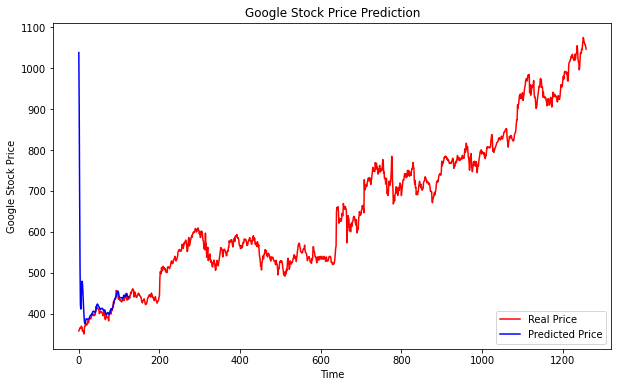

In [52]:
plt.figure(figsize=(10,6))
plt.plot(real_stock_price, color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()